In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Download and review the dataset

In [2]:
digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

From description we see that dataset consist of 1797 instances. Each instance is a 8x8 image of a number, in dataset it represented like 64 atributes, each atribute has values in range from 0 to 16 that represent the color saturation

In [4]:
# Show each 100 target value
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

Let's see how look our numbers

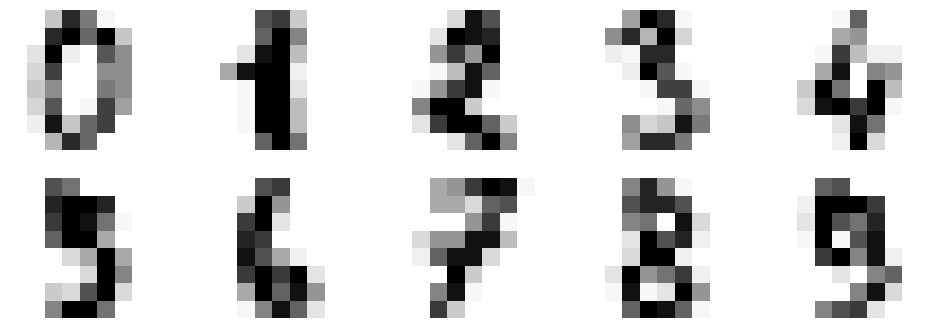

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(12,4))
for i, ax in enumerate(axes.flat):
    sns.heatmap(digits.images[i], cmap="Greys", ax=ax, cbar=False, square=True, xticklabels=False, yticklabels=False)
plt.show()

# Creation a KNN model

### Standard parameters

In [6]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11, test_size=0.2)

First let's see how the standard model performs

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
predicted = knn.predict(X=X_test)
expected = y_test

C:\Users\HP\Desktop\КПІ\Машинне навчання\MachineLearningCourse\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\HP\Desktop\КПІ\Машинне навчання\MachineLearningCourse\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [10]:
print(predicted[:20])
print(expected[:20])

[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6]
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6]


In [11]:
knn.score(X_test, y_test)

0.9888888888888889

We see that score is quite good

Let's see which images our model failed to recognize.
For this I will create a dataframe with three columns: first column is a true value, second is whether our model recognise image, and third column is a predicted value

In [12]:
standard_knn = pd.DataFrame()
standard_knn["Value"] = expected
standard_knn['IsTrue'] = [predicted[i] == expected[i] for i in range(len(predicted))]
standard_knn['Predicted value'] = predicted

In [13]:
standard_knn

,Value,IsTrue,Predicted value
0,0,True,0
1,4,True,4
2,9,True,9
3,9,True,9
4,3,True,3
...,...,...,...
355,4,True,4
356,4,True,4
357,5,True,5
358,7,True,7


True value: 3 
Predicted value: 5


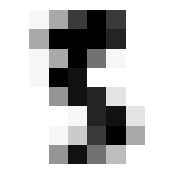

True value: 9 
Predicted value: 8


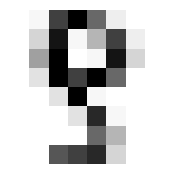

True value: 9 
Predicted value: 4


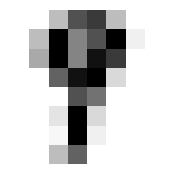

True value: 3 
Predicted value: 7


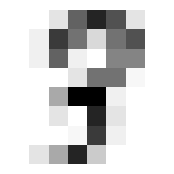

In [14]:
for i in standard_knn.index:
    if not standard_knn.loc[i, 'IsTrue']:
        print(f"True value: {standard_knn.Value[i]} \n"
              f"Predicted value: {standard_knn["Predicted value"][i]}")
        plt.figure(figsize=(2, 2))
        sns.heatmap(X_test[i].reshape(8,8), cmap="Greys", cbar=False, square=True, xticklabels=False, yticklabels=False)
        plt.show()

From these images we see why model failed to recognise them, even for me it would be difficult 

Let's also see more info

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [18]:
confusion

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]])

According to this confusion matrix, our model typically has problems with 3 and 9

In [19]:
from sklearn.metrics import classification_report

In [20]:
names = [str(digit) for digit in digits.target_names]

In [21]:
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       0.98      1.00      0.99        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.97      1.00      0.99        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360


### Non standard parameters 

In [22]:
n_grid = [1, 3, 5, 7, 9, 11]

for n in n_grid:
    print(f"For {n}")
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    print(knn.score(X_test, y_test))

For 1
0.9861111111111112
For 3
0.9888888888888889
For 5
0.9861111111111112
For 7
0.9833333333333333
For 9
0.9833333333333333
For 11
0.9861111111111112


We see that the best result is with n=3

##### More detailed parameter selection
For this step I will use GridSearch to automatically search for the optimal model parameters.
In GridSearch, I selected 4 parameters:

**weights** - this parameter assigns greater weight to the nearest neighbors during decision-making
**n_neighbors** - defines the number of neighbors to consider for voting (it’s better to choose an odd number to avoid ambiguity)
**p** - selects the distance metric, such as Euclidean or Manhattan
**leaf_size** - determines the leaf size of the tree, affecting the speed and structure of its construction

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'p': [1, 2],
    'leaf_size': [10, 20, 30]
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
print("Test accuracy:", best_model.score(X_test, y_test))


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters found: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best cross-validation accuracy: 0.9847004452187379
Test accuracy: 0.9888888888888889


After GridSearch we got the best parameters for KNN model, but it didn't improve the accuracy of the model. I assume that this is because our model is already very accurate and the only data that remains is simply impossible to identify

# Testing other models

In [24]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = [SVC(kernel="poly", degree=2), GaussianNB(), KNeighborsClassifier(n_neighbors=3)]

for model in models:
    current_model = model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)

0.9888888888888889
0.8555555555555555
0.9888888888888889


Other models also failed to improve results